In [1]:
import tqdm as tqdm

In [68]:
#Load dataset
import json


with open('../data/formatted/meta_dataset.txt', 'r') as jsonFile:
    meta_augmented = json.load(jsonFile)
    
with open('../data/formatted/dataset_augmented.txt', 'r') as jsonFile:
    dataset_augmented = json.load(jsonFile)
    
with open('../data/formatted/midi_voicing_dataset.txt', 'r') as jsonFile:
    midi_voicing_dataset = json.load(jsonFile)

print(len(midi_voicing_dataset), len(dataset_augmented), len(meta_augmented))

48072 48072 48072


- Fix the Style Token
- Split the songs that are too long into two sections

In [69]:
import importlib
import formats as fmt
importlib.reload(fmt)

fmt.correctStyleTokensInMeta(meta_augmented)

all_styles = []
for song in meta_augmented:     
    all_styles.append(song['style'])

styles = set(all_styles)
print(len(styles))
print(meta_augmented[0])

for i, song in enumerate(meta_augmented[:48]):
    print(song)

  0%|          | 0/48072 [00:00<?, ?it/s]

63
{'composer': 'George Gershwin, Ira Gershwin (1927)', 'style': 'Jazz', 'song_name': "'S Wonderful", 'tonality': 'C major', 'midi_key': 15, 'time_signature': '4/4', 'decade': 'Null'}
{'composer': 'George Gershwin, Ira Gershwin (1927)', 'style': 'Jazz', 'song_name': "'S Wonderful", 'tonality': 'C major', 'midi_key': 15, 'time_signature': '4/4', 'decade': 'Null'}
{'composer': 'George Gershwin, Ira Gershwin (1927)', 'style': 'Jazz', 'song_name': "'S Wonderful", 'tonality': 'Db major', 'midi_key': 15, 'time_signature': '4/4', 'decade': 'Null'}
{'composer': 'George Gershwin, Ira Gershwin (1927)', 'style': 'Jazz', 'song_name': "'S Wonderful", 'tonality': 'D major', 'midi_key': 15, 'time_signature': '4/4', 'decade': 'Null'}
{'composer': 'George Gershwin, Ira Gershwin (1927)', 'style': 'Jazz', 'song_name': "'S Wonderful", 'tonality': 'Eb major', 'midi_key': 15, 'time_signature': '4/4', 'decade': 'Null'}
{'composer': 'George Gershwin, Ira Gershwin (1927)', 'style': 'Jazz', 'song_name': "'S Won

In [70]:
#Add the tonality token to the dataset and to the midi_voicing_dataset
new_dataset = dataset_augmented.copy()
for i, song in enumerate(new_dataset):
    song[0] = ['Style', 0.0]
    midi_voicing_dataset[i][0] = [[0, 0, 0, 0, 0, 0, 0, 0], 0.0, 'Style']
    tonality = meta_augmented[i]['tonality']
    tonal_token = ['Tonality', 0.0]
    element_to_add = [tonality, 0.0]
    #add these two elements into the third position of the list
    song.insert(2, tonal_token)
    song.insert(3, element_to_add)
    
    midi_tonal_token = [[0, 0, 0, 0, 0, 0, 0, 0], 0.0, 'Tonality']
    element_to_add = [[0, 0, 0, 0, 0, 0, 0, 0], 0.0, tonality]
    midi_voicing_dataset[i].insert(2, midi_tonal_token)
    midi_voicing_dataset[i].insert(3, element_to_add)
    
print(len(new_dataset), len(midi_voicing_dataset))

48072 48072


In [67]:
def array_to_tuples(array):
    return [tuple(sub_array) for sub_array in array]

In [7]:
# for i, song in enumerate(new_dataset):
#     ar = array_to_tuples(song)
#     new_dataset[i] = ar
    
# #ar = array_to_tuples(new_dataset[0])
# print(new_dataset[0])

[('Style', 0.0), ('Medium Swing', 0.0), ('Tonality', 0.0), ('C major', 0.0), ('|', 0.0), ('.', 4.0), ('C', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('C', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('C#', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('C#', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('D', 4.0), ('m7', 4.0), ('|', 4.0), ('.', 4.0), ('G', 4.0), ('dom7', 4.0), ('|', 4.0), ('.', 4.0), ('C', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('C', 4.0), ('maj', 4.0), ('|', 0.0), ('.', 4.0), ('C', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('C', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('C#', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('C#', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('D', 4.0), ('m7', 4.0), ('|', 4.0), ('.', 4.0), ('G', 4.0), ('dom7', 4.0), ('|', 4.0), ('.', 4.0), ('C', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 2.0), ('F#', 2.0), ('m7', 2.0), ('.', 2.0), ('B', 2.0), ('dom7', 2.0), ('|', 2.0), ('.', 4.0), ('E', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 2.0), ('F#', 2.0), (

In [8]:
# for i, song in enumerate(midi_voicing_dataset):
#     ar = array_to_tuples(song)
#     midi_voicing_dataset[i] = ar
    
# #ar = array_to_tuples(new_dataset[0])
# print(midi_voicing_dataset[0])

[([0, 0, 0, 0, 0, 0, 0, 0], 0.0, 'Style'), ([0, 0, 0, 0, 0, 0, 0, 0], 0.0, 'Medium Swing'), ([0, 0, 0, 0, 0, 0, 0, 0], 0.0, 'Tonality'), ([0, 0, 0, 0, 0, 0, 0, 0], 0.0, 'C major'), ([0, 0, 0, 0, 0, 0, 0, 0], 0.0, '|'), ([0, 0, 0, 0, 0, 0, 0, 0], 4.0, '.'), ([48, 0, 0, 0, 0, 0, 0, 0], 4.0, 'C'), ([48, 55, 64, 67, 0, 0, 0, 0], 4.0, 'maj'), ([0, 0, 0, 0, 0, 0, 0, 0], 4.0, '|'), ([0, 0, 0, 0, 0, 0, 0, 0], 4.0, '.'), ([48, 0, 0, 0, 0, 0, 0, 0], 4.0, 'C'), ([48, 55, 64, 67, 0, 0, 0, 0], 4.0, 'maj'), ([0, 0, 0, 0, 0, 0, 0, 0], 4.0, '|'), ([0, 0, 0, 0, 0, 0, 0, 0], 4.0, '.'), ([49, 0, 0, 0, 0, 0, 0, 0], 4.0, 'C#'), ([49, 55, 61, 64, 0, 0, 0, 0], 4.0, 'o'), ([0, 0, 0, 0, 0, 0, 0, 0], 4.0, '|'), ([0, 0, 0, 0, 0, 0, 0, 0], 4.0, '.'), ([49, 0, 0, 0, 0, 0, 0, 0], 4.0, 'C#'), ([49, 55, 61, 64, 0, 0, 0, 0], 4.0, 'o'), ([0, 0, 0, 0, 0, 0, 0, 0], 4.0, '|'), ([0, 0, 0, 0, 0, 0, 0, 0], 4.0, '.'), ([50, 0, 0, 0, 0, 0, 0, 0], 4.0, 'D'), ([50, 57, 60, 65, 0, 0, 0, 0], 4.0, 'm7'), ([0, 0, 0, 0, 0, 0, 0, 0], 

In [5]:
id = 24768
print(new_dataset[id][:2048])

[['Style', 0.0], ['Medium Shuffle', 0.0], ['Tonality', 0.0], ['C major', 0.0], ['Form_intro', 0.0], ['|', 0.0], ['.', 1.0], ['C', 1.0], ['maj', 1.0], ['.', 1.0], ['C', 1.0], ['maj', 1.0], ['/', 1.0], ['E', 1.0], ['.', 1.0], ['F', 1.0], ['maj', 1.0], ['.', 1.0], ['F', 1.0], ['maj', 1.0], ['/', 1.0], ['A', 1.0], ['|', 1.0], ['.', 1.0], ['C', 1.0], ['maj', 1.0], ['.', 1.0], ['C', 1.0], ['maj', 1.0], ['/', 1.0], ['E', 1.0], ['.', 1.0], ['F', 1.0], ['maj', 1.0], ['.', 1.0], ['F', 1.0], ['maj', 1.0], ['/', 1.0], ['A', 1.0], ['|', 1.0], ['.', 1.0], ['C', 1.0], ['maj', 1.0], ['.', 1.0], ['C', 1.0], ['maj', 1.0], ['/', 1.0], ['E', 1.0], ['.', 1.0], ['F', 1.0], ['maj', 1.0], ['.', 1.0], ['F', 1.0], ['maj', 1.0], ['/', 1.0], ['G', 1.0], ['|', 1.0], ['.', 1.0], ['Ab', 1.0], ['maj', 1.0], ['.', 1.0], ['Bb', 1.0], ['maj', 1.0], ['.', 2.0], ['C', 2.0], ['maj', 2.0], ['Form_A', 2.0], ['|', 2.0], ['.', 1.0], ['C', 1.0], ['maj', 1.0], ['.', 1.0], ['C', 1.0], ['maj', 1.0], ['/', 1.0], ['E', 1.0], ['.', 1

In [71]:
#Add Start and End token

for i, song in enumerate(new_dataset):
    start_token = ['<Start>', 0.0]
    end_token = ['<End>', 0.0]
    song.insert(4, start_token)
    song.append(end_token)
    
print(len(new_dataset))

48072


In [72]:
for i, song in enumerate(midi_voicing_dataset):
    start_token = [[0, 0, 0, 0, 0, 0, 0, 0], 0.0, '<Start>']
    end_token = [[0, 0, 0, 0, 0, 0, 0, 0], 0.0, '<End>']
    song.insert(4, start_token)
    song.append(end_token)
    
print(len(midi_voicing_dataset))

48072


In [73]:
#Cut the songs that are longer than 2048
dataset = new_dataset.copy()
dataset = [song[:2048] for song in dataset]

for i, song in enumerate(dataset):
    if len(song) == 2048:
        element = song[-1][0]
        if element == '|' or element == '.' and element != '<End>':
            song[-1][0] = '<End>'
        else:
        #cut the last element until it is a bar or dot and change it to <End>
            while element != '|' and element != '.':
                song.pop()
                element = song[-1][0]
            song[-1][0] = '<End>'    
                
id = 5676
print(len(dataset))

dataset[id][-8:] 

48072


[['.', 2.0],
 ['Eb', 2.0],
 ['maj', 2.0],
 ['.', 1.0],
 ['G', 1.0],
 ['m', 1.0],
 ['|', 1.0],
 ['<End>', 1.0]]

In [74]:
#Cut the songs that are longer than 2048 in MIDI voicing dataset
midi_dataset = midi_voicing_dataset.copy()
midi_dataset = [song[:2048] for song in midi_dataset]

for i, song in enumerate(midi_dataset):
    if len(song) == 2048:
        element = song[-1][2]
        #print(element)
        if element == '|' or element == '.' and element != '<End>':
            song[-1][2] = '<End>'
        else:
        #cut the last element until it is a bar or dot and change it to <End>
            while element != '|' and element != '.':
                song.pop()
                element = song[-1][2]
            song[-1][2] = '<End>'    
                
id = 5676
print(len(midi_dataset))

midi_dataset[id][-8:] 

48072


[[[0, 0, 0, 0, 0, 0, 0, 0], 2.0, '.'],
 [[51, 0, 0, 0, 0, 0, 0, 0], 2.0, 'Eb'],
 [[51, 58, 67, 70, 0, 0, 0, 0], 2.0, 'maj'],
 [[0, 0, 0, 0, 0, 0, 0, 0], 1.0, '.'],
 [[43, 0, 0, 0, 0, 0, 0, 0], 1.0, 'G'],
 [[43, 55, 58, 62, 0, 0, 0, 0], 1.0, 'm'],
 [[0, 0, 0, 0, 0, 0, 0, 0], 1.0, '|'],
 [[0, 0, 0, 0, 0, 0, 0, 0], 1.0, '<End>']]

In [34]:
id = 5676
print(len(dataset[id]))
dataset[id][-6:]

2046


[['maj', 2.0], ['.', 1.0], ['G', 1.0], ['m', 1.0], ['|', 1.0], ['<End>', 1.0]]

In [75]:
#Check the length of the song

max = {'v': 0, 'id': 0}
min = {'v': 1000, 'id': 0}

for i in range(len(midi_dataset)):
    if len(dataset[i]) > max['v']:
        max['v'] = len(dataset[i])
        max['id'] = i
    if len(dataset[i]) < min['v']:
        min['v'] = len(dataset[i])
        min['id'] = i

print('Max:', max, 'Min:', min)

#calculate how many songs are longer than 2048
counter = 0
lengths = []
for i, song in enumerate(dataset):
    if len(song) > 2048:
        counter += 1
        lengths.append(len(song))
print(counter, lengths)

Max: {'v': 2048, 'id': 5556} Min: {'v': 122, 'id': 39972}
0 []


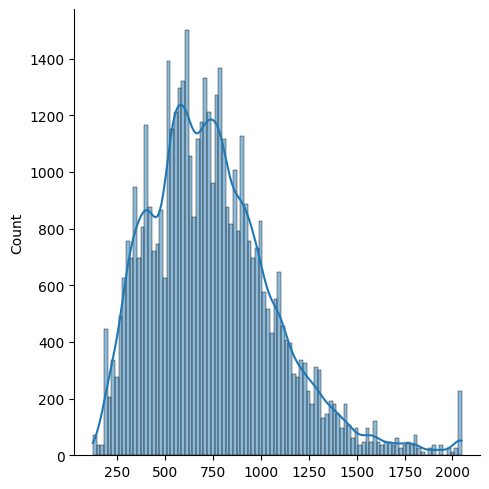

In [76]:
import seaborn as sns

#visualize the length of the songs

length = []
for song in midi_dataset:
    length.append(len(song))
    
sns.displot(length, kde=True, bins=100)

In [41]:
print(dataset[0][:512])

[['Style', 0.0], ['Medium Swing', 0.0], ['Tonality', 0.0], ['C major', 0.0], ['<Start>', 0.0], ['|', 0.0], ['.', 4.0], ['C', 4.0], ['maj', 4.0], ['|', 4.0], ['.', 4.0], ['C', 4.0], ['maj', 4.0], ['|', 4.0], ['.', 4.0], ['C#', 4.0], ['o', 4.0], ['|', 4.0], ['.', 4.0], ['C#', 4.0], ['o', 4.0], ['|', 4.0], ['.', 4.0], ['D', 4.0], ['m7', 4.0], ['|', 4.0], ['.', 4.0], ['G', 4.0], ['dom7', 4.0], ['|', 4.0], ['.', 4.0], ['C', 4.0], ['maj', 4.0], ['|', 4.0], ['.', 4.0], ['C', 4.0], ['maj', 4.0], ['|', 0.0], ['.', 4.0], ['C', 4.0], ['maj', 4.0], ['|', 4.0], ['.', 4.0], ['C', 4.0], ['maj', 4.0], ['|', 4.0], ['.', 4.0], ['C#', 4.0], ['o', 4.0], ['|', 4.0], ['.', 4.0], ['C#', 4.0], ['o', 4.0], ['|', 4.0], ['.', 4.0], ['D', 4.0], ['m7', 4.0], ['|', 4.0], ['.', 4.0], ['G', 4.0], ['dom7', 4.0], ['|', 4.0], ['.', 4.0], ['C', 4.0], ['maj', 4.0], ['|', 4.0], ['.', 2.0], ['F#', 2.0], ['m7', 2.0], ['.', 2.0], ['B', 2.0], ['dom7', 2.0], ['|', 2.0], ['.', 4.0], ['E', 4.0], ['maj', 4.0], ['|', 4.0], ['.', 2.

In [77]:
#Cut the samples longer than 1024 in half and add them to the dataset
fixed_dataset = []
fixed_meta = []
for i, song in enumerate(dataset):
    if len(song) > 1024:
        size = len(song)
        half = size // 2
        fixed_dataset.append(song[:half])
        fixed_meta.append(meta_augmented[i])
        new_section = song[half:]
        fixed_dataset.append(new_section)
        fixed_meta.append(meta_augmented[i])
    else:
        fixed_dataset.append(song)
        fixed_meta.append(meta_augmented[i])

print(len(fixed_dataset), len(fixed_meta)) 

56412 56412


In [78]:
fixed_midi_dataset = []

for i, song in enumerate(midi_dataset):
    if len(song) > 1024:
        size = len(song)
        half = size // 2
        fixed_midi_dataset.append(song[:half])
        new_section = song[half:]
        fixed_midi_dataset.append(new_section)
    else:
        fixed_midi_dataset.append(song)

print(len(fixed_midi_dataset)) 

56412


In [79]:
print(len(fixed_dataset), len(fixed_midi_dataset))

56412 56412


In [83]:
print(fixed_dataset[0])

[['Style', 0.0], ['Medium Swing', 0.0], ['Tonality', 0.0], ['C major', 0.0], ['<Start>', 0.0], ['|', 0.0], ['.', 4.0], ['C', 4.0], ['maj', 4.0], ['|', 4.0], ['.', 4.0], ['C', 4.0], ['maj', 4.0], ['|', 4.0], ['.', 4.0], ['C#', 4.0], ['o', 4.0], ['|', 4.0], ['.', 4.0], ['C#', 4.0], ['o', 4.0], ['|', 4.0], ['.', 4.0], ['D', 4.0], ['m7', 4.0], ['|', 4.0], ['.', 4.0], ['G', 4.0], ['dom7', 4.0], ['|', 4.0], ['.', 4.0], ['C', 4.0], ['maj', 4.0], ['|', 4.0], ['.', 4.0], ['C', 4.0], ['maj', 4.0], ['|', 0.0], ['.', 4.0], ['C', 4.0], ['maj', 4.0], ['|', 4.0], ['.', 4.0], ['C', 4.0], ['maj', 4.0], ['|', 4.0], ['.', 4.0], ['C#', 4.0], ['o', 4.0], ['|', 4.0], ['.', 4.0], ['C#', 4.0], ['o', 4.0], ['|', 4.0], ['.', 4.0], ['D', 4.0], ['m7', 4.0], ['|', 4.0], ['.', 4.0], ['G', 4.0], ['dom7', 4.0], ['|', 4.0], ['.', 4.0], ['C', 4.0], ['maj', 4.0], ['|', 4.0], ['.', 2.0], ['F#', 2.0], ['m7', 2.0], ['.', 2.0], ['B', 2.0], ['dom7', 2.0], ['|', 2.0], ['.', 4.0], ['E', 4.0], ['maj', 4.0], ['|', 4.0], ['.', 2.

In [80]:
dataset = fixed_dataset
midi_dataset = fixed_midi_dataset
meta_augmented = fixed_meta

In [81]:
#Add the <pad> token to the dataset and to the midi_voicing_dataset, max length is 1024

for i, song in enumerate(dataset):
    if len(song) < 1024:
        for j in range(1024 - len(song)):
            song.append(['<pad>', 0.0])

for i, song in enumerate(midi_dataset):
    if len(song) < 1024:
        for j in range(1024 - len(song)):
            song.append([[0, 0, 0, 0, 0, 0, 0, 0], 0.0, '<pad>'])

print(len(dataset), len(midi_dataset))
    

56412 56412


In [84]:
import numpy as np
dataset = np.array(dataset, dtype=object)
midi_dataset = np.array(midi_dataset, dtype=object)
meta_augmented = np.array(meta_augmented, dtype=object)
print(dataset.shape, midi_dataset.shape, meta_augmented.shape)

#save the dataset
np.save('../data/formatted/dataset.npy', dataset)
np.save('../data/formatted/midi_dataset.npy', midi_dataset)
np.save('../data/formatted/meta_augmented.npy', meta_augmented)


(56412, 1024, 2) (56412, 1024, 3) (56412,)
